In [ ]:
##  fft_showcasing

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


im = cv2.imread('/content/drive/MyDrive/Image_Processing_Photos/Baboon.bmp', cv2.IMREAD_GRAYSCALE)

# Calculate the 2D FFT and shift the zero frequency components to the center
fft_result = np.fft.fftshift(np.fft.fft2(im))

# Calculate the magnitude and phase of the FFT
mag = np.abs(fft_result)
phase = np.angle(fft_result)

# Display the original image, magnitude, magnitude with log scale, and phase
plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(im, cmap='gray')
plt.title('original image')

plt.subplot(2, 2, 2)
plt.imshow(mag, cmap='gray')
plt.title('magnitude (no scale)')

plt.subplot(2, 2, 3)
plt.imshow(np.log1p(mag), cmap='gray')
plt.title('magnitude with log scale')

plt.subplot(2, 2, 4)
plt.imshow(phase, cmap='gray')
plt.title('phase')

plt.show()

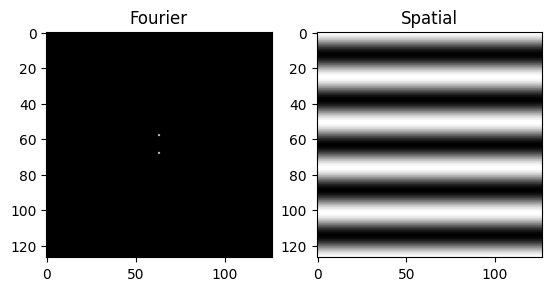

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import ifftshift, ifft2

x = 127
y = 127
im = np.zeros((x, y))
distance = 5

im[int(y/2) + distance, int(x/2)] = 255
im[int(y/2) - distance, int(x/2)] = 255

out = ifftshift(im)

#tmp = ifft2(out)
out = ifft2(out).real
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(im.astype(np.uint8), cmap='gray')
plt.title('Fourier')
plt.subplot(1, 2, 2)
plt.imshow(out, cmap='gray')
plt.title('Spatial')
plt.show()


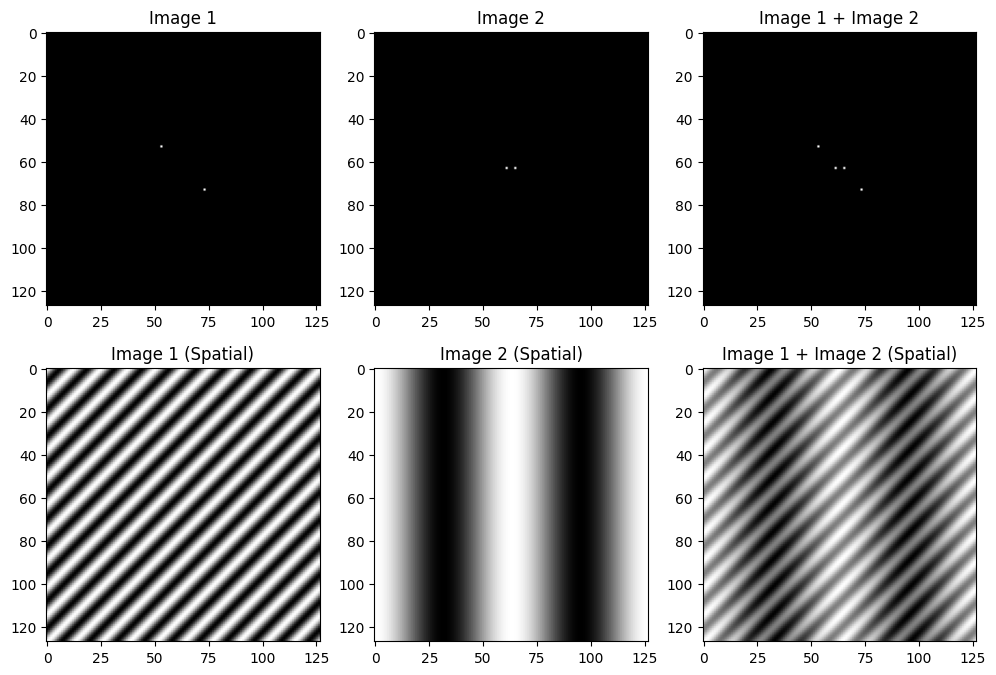

In [ ]:
## composing_basis_funcs

import numpy as np
import cv2
import matplotlib.pyplot as plt

# Clear any existing data
plt.close('all')

x = 127
y = 127

# IMAGE1
im1 = np.zeros((y, x), dtype=np.uint8)
distance = 10


im1[int(y/2) + distance, int(x/2) + distance] = 255
im1[int(y/2) - distance, int(x/2) - distance] = 255

out1 = np.fft.ifftshift(im1)
out1 = np.real(np.fft.ifft2(out1))

# IMAGE2
im2 = np.zeros((y, x), dtype=np.uint8)
distance = 2
im2[int(y/2), int(x/2) - distance] = 255
im2[int(y/2), int(x/2) + distance] = 255

out2 = np.fft.ifftshift(im2)
out2 = np.real(np.fft.ifft2(out2))

# SUM
im_sum = im1 + im2
out_sum = np.fft.ifftshift(im_sum)
out_sum = np.real(np.fft.ifft2(out_sum))

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(im1, cmap='gray')
plt.title('Image 1')

plt.subplot(2, 3, 2)
plt.imshow(im2, cmap='gray')
plt.title('Image 2')

plt.subplot(2, 3, 3)
plt.imshow(im_sum, cmap='gray')
plt.title('Image 1 + Image 2')

plt.subplot(2, 3, 4)
plt.imshow(out1, cmap='gray')
plt.title('Image 1 (Spatial)')

plt.subplot(2, 3, 5)
plt.imshow(out2, cmap='gray')
plt.title('Image 2 (Spatial)')

plt.subplot(2, 3, 6)
plt.imshow(out_sum, cmap='gray')
plt.title('Image 1 + Image 2 (Spatial)')

plt.show()


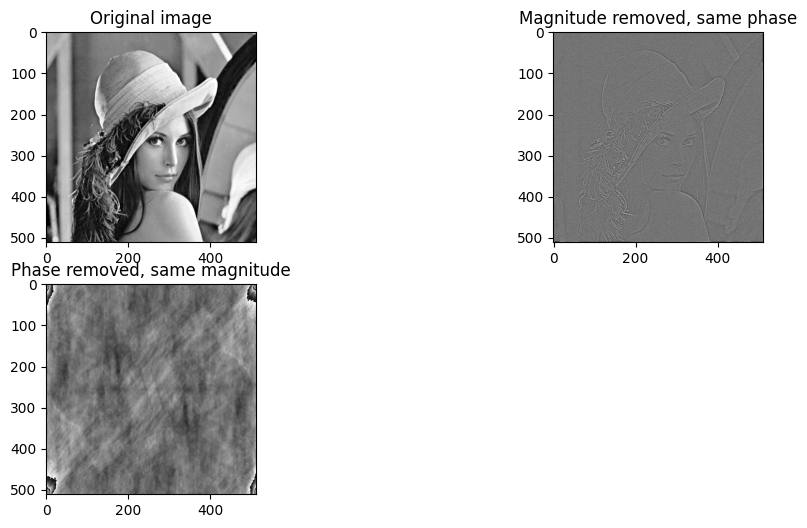

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


og_image = cv2.imread('/content/drive/MyDrive/Image_Processing_Photos/Lena.bmp', cv2.IMREAD_GRAYSCALE)

# Convert the image to double precision
im = np.double(og_image)


# Calculate the 2D FFT
im_fft = np.fft.fft2(im)

# Find the magnitudes and phase responses
mag = np.abs(im_fft)  # magnitude
pha = np.angle(im_fft)  # phase

mag_ones = np.ones_like(mag)
phase_zeros = np.zeros_like(pha)

# Remove magnitude (out1) and phase (out2)
out1 = mag_ones * np.exp(1j * pha)
out2 = mag * np.exp(1j * phase_zeros)

# Find the inverse images
out1 = np.real(np.fft.ifft2(out1))
out2 = np.real(np.fft.ifft2(out2))

# Normalize and convert to uint8 for display
out1 = np.uint8(255 * (out1 - np.min(out1)) / (np.max(out1) - np.min(out1)))

# Show the images
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(og_image, cmap='gray')
plt.title('Original image')

plt.subplot(2, 2, 2)
plt.imshow(out1, cmap='gray', vmin=0, vmax=255)
plt.title('Magnitude removed, same phase')

plt.subplot(2, 2, 3)
plt.imshow(out2.astype(np.uint8), cmap='gray', vmin=0, vmax=255)
plt.title('Phase removed, same magnitude')

plt.show()


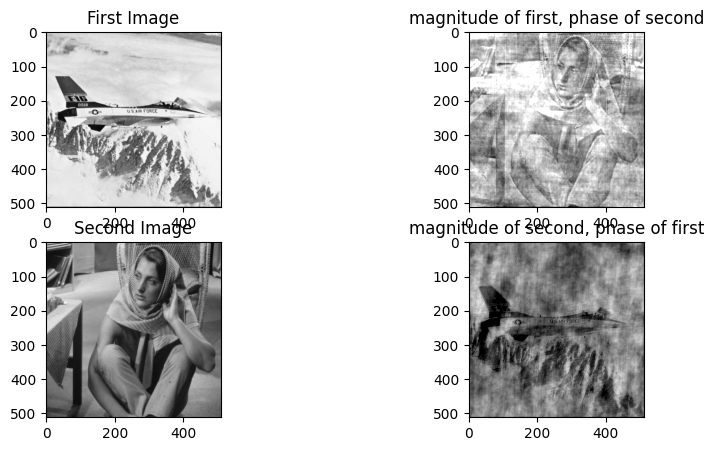

In [ ]:
## phase_switching.m


import cv2
import numpy as np
import matplotlib.pyplot as plt


Image1 = cv2.imread('/content/drive/MyDrive/Image_Processing_Photos/F16.bmp', cv2.IMREAD_GRAYSCALE).astype(float)
Image2 = cv2.imread('/content/drive/MyDrive/Image_Processing_Photos/Barbara.bmp', cv2.IMREAD_GRAYSCALE).astype(float)

# Compute the 2D FFTs
Image1_FFT = np.fft.fft2(Image1)
Image2_FFT = np.fft.fft2(Image2)

# Find the magnitudes and phase responses
mag1 = np.abs(Image1_FFT)
mag2 = np.abs(Image2_FFT)
pha1 = np.angle(Image1_FFT)
pha2 = np.angle(Image2_FFT)

# Recompute frequency responses by swapping the phases
out1 = mag1 * np.exp(1j * pha2)
out2 = mag2 * np.exp(1j * pha1)

# Find the inverse images
out1 = np.real(np.fft.ifft2(out1))
out2 = np.real(np.fft.ifft2(out2))

# Show the images
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.imshow(Image1.astype(np.uint8), cmap='gray')
plt.title('First Image')

plt.subplot(2, 2, 2)
plt.imshow(out1, cmap='gray', vmin=0, vmax=255)
plt.title('magnitude of first, phase of second')

plt.subplot(2, 2, 3)
plt.imshow(Image2.astype(np.uint8), cmap='gray')
plt.title('Second Image')

plt.subplot(2, 2, 4)
plt.imshow(out2, cmap='gray', vmin=0, vmax=255)
plt.title('magnitude of second, phase of first')

plt.show()


<ipython-input-63-e56c71da23f4>:38: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(out)), cmap='gray')
<ipython-input-63-e56c71da23f4>:41: ComplexWarning: Casting complex values to real discards the imaginary part
  out = np.uint8(np.fft.ifft2(np.fft.ifftshift(out)))


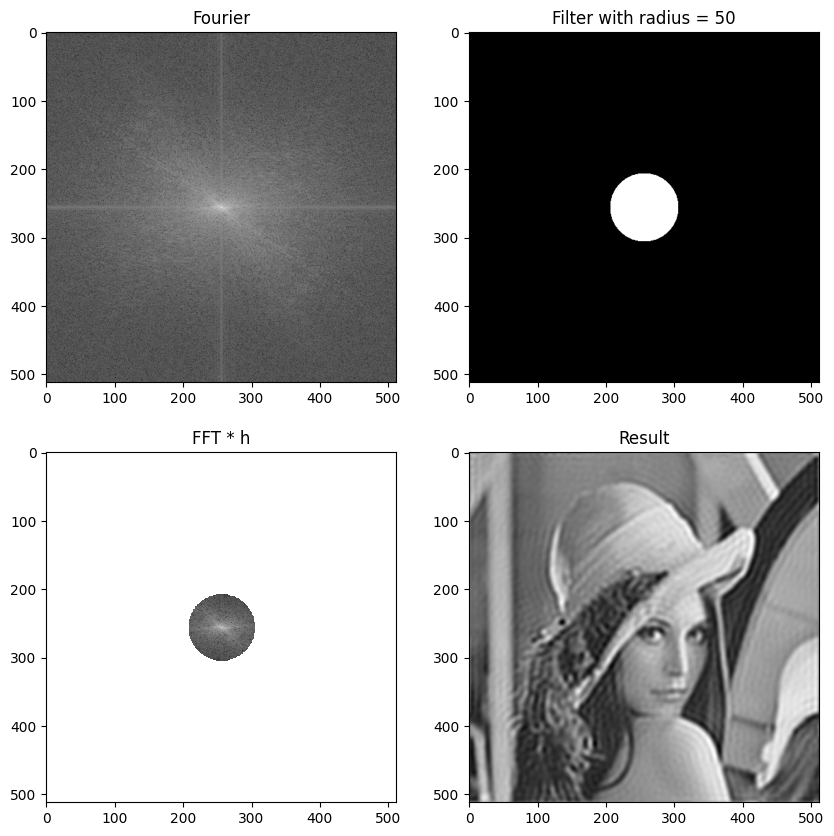

In [ ]:
## ideal_filter


import cv2
import numpy as np
import matplotlib.pyplot as plt


im = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/Image_Processing_Photos/Lena.bmp'), cv2.COLOR_BGR2GRAY)

m, n = im.shape

# Create a circle filter with a specified radius
[x, y] = np.meshgrid(np.arange(-m/2, m/2), np.arange(-n/2, n/2))
z = np.sqrt(x**2 + y**2)
r = 50  # Radius
h = z < r  # The filter cutoff

# Uncomment the following line for high pass instead of low pass
# h = 1 - h

# Perform Fourier operations
im_fft = np.fft.fftshift(np.fft.fft2(im))

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(np.log(np.abs(im_fft)), cmap='gray')
plt.title('Fourier')

plt.subplot(2, 2, 2)
plt.imshow(h, cmap='gray')
plt.title(f'Filter with radius = {r}')

out = im_fft * h

plt.subplot(2, 2, 3)
plt.imshow(np.log(np.abs(out)), cmap='gray')
plt.title('FFT * h')

out = np.uint8(np.fft.ifft2(np.fft.ifftshift(out)))

plt.subplot(2, 2, 4)
plt.imshow(out, cmap='gray')
plt.title('Result')

plt.show()


<ipython-input-64-77a7c4b5bd1d>:44: ComplexWarning: Casting complex values to real discards the imaginary part
  out = np.uint8(np.fft.ifft2(np.fft.ifftshift(out)))


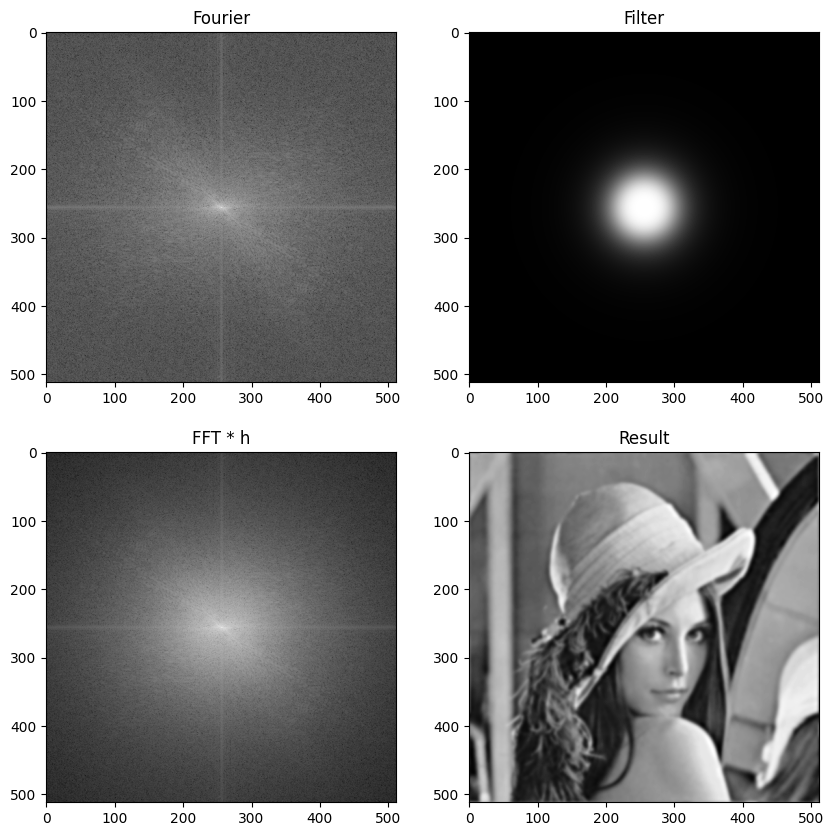

In [ ]:
## Butterworth_filter


import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the grayscale image
im = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/Image_Processing_Photos/Lena.bmp'), cv2.COLOR_BGR2GRAY)

m, n = im.shape

# Create a circle filter with a specified cutoff frequency
[x, y] = np.meshgrid(np.arange(-m/2, m/2), np.arange(-n/2, n/2))
D = np.sqrt(x**2 + y**2)

n = 2  # The higher n is, the closer it gets to ideal
D0 = 50  # Cutoff frequency

h = 1 / (1 + (D/D0)**(2*n))  # The filter

# Uncomment the following line for high pass instead of low pass
# h = 1 - h

# Perform Fourier operations
im_fft = np.fft.fftshift(np.fft.fft2(im))

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(np.log(np.abs(im_fft)), cmap='gray')
plt.title('Fourier')

plt.subplot(2, 2, 2)
plt.imshow(h, cmap='gray')
plt.title('Filter')

out = im_fft * h

plt.subplot(2, 2, 3)
plt.imshow(np.log(np.abs(out)), cmap='gray')
plt.title('FFT * h')

out = np.uint8(np.fft.ifft2(np.fft.ifftshift(out)))

plt.subplot(2, 2, 4)
plt.imshow(out, cmap='gray')
plt.title('Result')

plt.show()


<ipython-input-4-95fd8f72ac59>:42: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(out)), cmap='gray')
<ipython-input-4-95fd8f72ac59>:45: ComplexWarning: Casting complex values to real discards the imaginary part
  out = np.uint8(np.fft.ifft2(np.fft.ifftshift(out)))


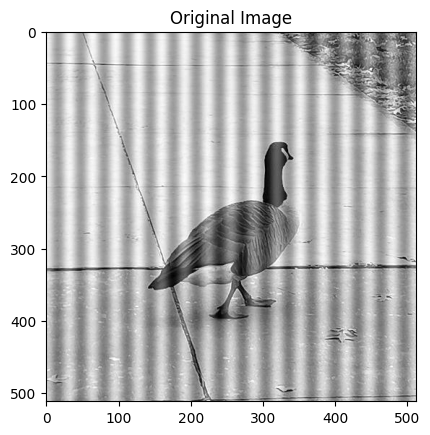

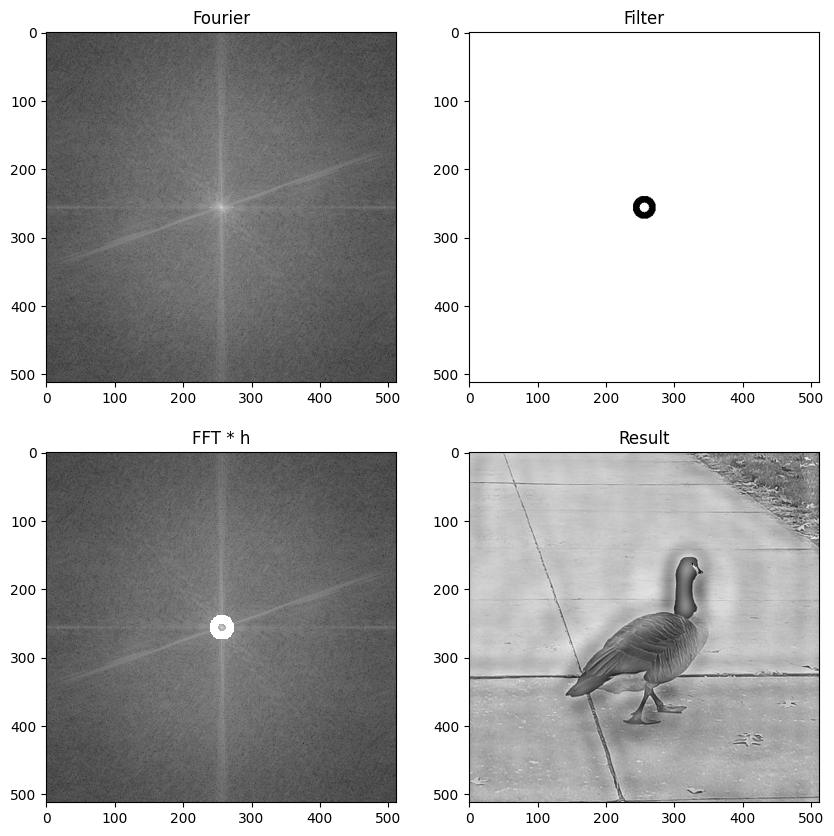

In [ ]:
## bandreject_filter


import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the grayscale image
im = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/Image_Processing_Photos/duck.bmp'), cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(im, cmap='gray')
plt.title('Original Image')

m, n = im.shape

# Create a bandpass or bandreject filter using two radii
[x, y] = np.meshgrid(np.arange(-m/2, m/2), np.arange(-n/2, n/2))
z = np.sqrt(x**2 + y**2)
r1 = 7  # Inner radius
r2 = 17  # Outer radius
h = (z > r1) & (z < r2)  # The filter

# Uncomment the following line for band reject instead of band pass
h = 1 - h

# Perform Fourier operations
im_fft = np.fft.fftshift(np.fft.fft2(im))

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(np.log(np.abs(im_fft)), cmap='gray')
plt.title('Fourier')

plt.subplot(2, 2, 2)
plt.imshow(h, cmap='gray')
plt.title('Filter')

out = im_fft * h

plt.subplot(2, 2, 3)
plt.imshow(np.log(np.abs(out)), cmap='gray')
plt.title('FFT * h')

out = np.uint8(np.fft.ifft2(np.fft.ifftshift(out)))

plt.subplot(2, 2, 4)
plt.imshow(out, cmap='gray')
plt.title('Result')

plt.show()


<ipython-input-135-675e004ef0e8>:40: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(out)), cmap='gray')
<ipython-input-135-675e004ef0e8>:43: ComplexWarning: Casting complex values to real discards the imaginary part
  out = np.uint8(np.fft.ifft2(np.fft.ifftshift(out)))


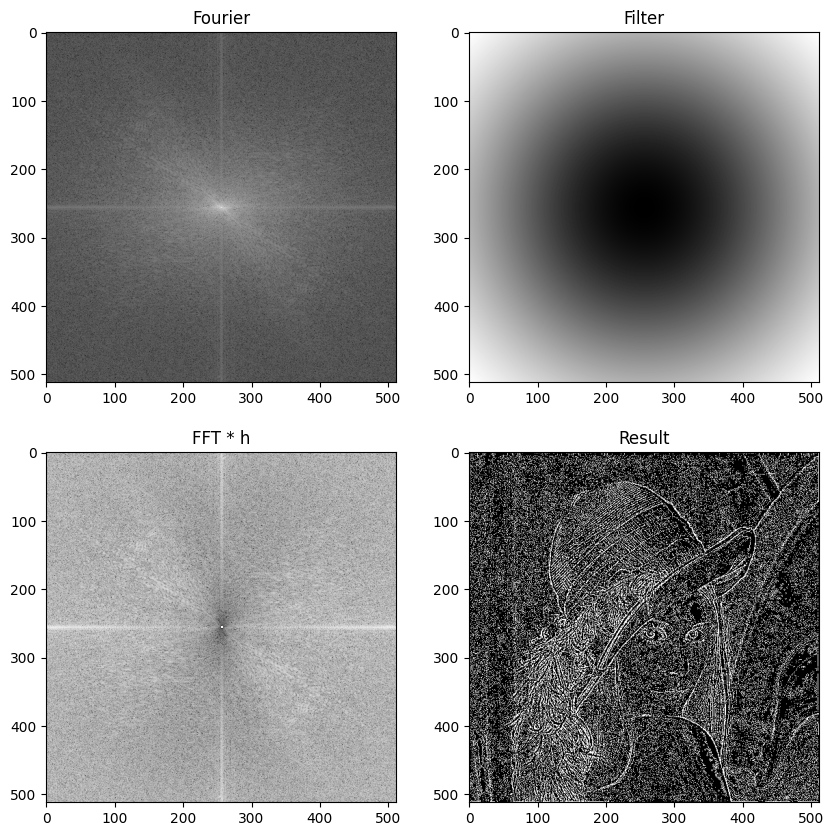

In [ ]:
## guassian_filter

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the grayscale image
im = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/Image_Processing_Photos/Lena.bmp'), cv2.COLOR_BGR2GRAY)

m, n = im.shape

# Create a Gaussian low-pass filter
[x, y] = np.meshgrid(np.arange(-m/2, m/2), np.arange(-n/2, n/2))
D = np.sqrt(x**2 + y**2)
D0 = 200  # Standard deviation

h = np.exp(-D**2 / (2 * (D0**2)))  # The filter


# Uncomment the following line for high pass instead of low pass
h = 1 - h

# Perform Fourier operations
im_fft = np.fft.fftshift(np.fft.fft2(im))


plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(np.log(np.abs(im_fft)), cmap='gray')
plt.title('Fourier')

plt.subplot(2, 2, 2)
plt.imshow(h, cmap='gray')
plt.title('Filter')

out = im_fft * h

plt.subplot(2, 2, 3)
plt.imshow(np.log(np.abs(out)), cmap='gray')
plt.title('FFT * h')

out = np.uint8(np.fft.ifft2(np.fft.ifftshift(out)))
plt.subplot(2, 2, 4)
plt.imshow(out, cmap='gray')
plt.title('Result')

plt.show()
